# Mutagenese
In these experiments, a genome undergo several mutations that are virtually applied: their neutrality proportion and length for the neutral ones are recorded but the genome isn't modified.

The estimators of the neutral proportion and mean length are compared to what is expected (from mathematical formulas)

On the plots, the errorbar are the standard deviation of the estimator: it is expected that the mean distance between the estimator and the theoretical value is this standrad deviation $\left(\sqrt{\frac{\sigma²}{n}}\right)$.

## Imports, objects and functions

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
class Results:
    def __init__(self, power_min, power_max):
        self.power_min, self.power_max = power_min, power_max
        results_length = self.power_max - self.power_min + 1

        self.x_values = np.empty(results_length, dtype="int")

        self.neutral_proportions = np.empty(results_length, dtype="float")
        self.neutral_proportiond_stds = np.empty(results_length, dtype="float")

        self.theoretical_proportions = np.empty(results_length, dtype="float")

        self.length_means = np.empty(results_length, dtype="float")
        self.length_means_stds = np.empty(results_length, dtype="float")

        self.theoretical_lengths = np.empty(results_length, dtype="float")

    def load_results(self, folder):
        d_results = {}
        for exposant in range(self.power_min, self.power_max + 1):
            with open(f"{folder}/{exposant}.json") as json_file:
                d_results[exposant] = json.load(json_file)
        for index, (exposant, results) in enumerate(d_results.items()):
            self.x_values[index] = float(f"1e{exposant}")
            self.neutral_proportions[index] = results["Neutral mutations proportion"]
            self.neutral_proportiond_stds[index] = results[
                "Neutral mutations standard deviation of proportion estimator"
            ]

            self.theoretical_proportions[index] = results["Neutral probability theory"]

            self.length_means[index] = results["Length mean"]
            self.length_means_stds[index] = results[
                "Length standard deviation of mean estimator"
            ]

            self.theoretical_lengths[index] = results["Length mean theory"]

## Homogeneous and single-directional genome

In [ ]:
results = Results(1, 7)
experiment_name = "check_probability/1"
variable = "z_nc"

### Ponctual Mutations

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Point mutation")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Point Mutation neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Point Mutation neutral proportion")

plt.legend()
plt.show()
plt.close()

La proportion de mutations ponctuelles neutres est indépendante de $g$, conformément au modèle mathématiques. Dans ce cas, cette proportion est égale à 0,5.

### Small Insertions

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small insertion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Insertion neutral proportion")

plt.legend()
plt.show()
plt.close()

In [ ]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Insertion length mean")

plt.legend()
plt.show()
plt.close()

### Small Deletions

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small deletion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

In [ ]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Deletion length mean")

plt.legend()
plt.show()
plt.close()

### Duplications

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Duplication")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Duplication neutral proportion depending on {variable}")

axs[0].set_xlabel(f"{variable}")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Duplication neutral proportion depending on {variable} (log scale)")

axs[1].set_xlabel(f"{variable}")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
cut = 2
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")

plt.legend()
plt.show()
plt.close()

In [ ]:
cut = -2  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

### Deletions

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Deletion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Deletion neutral proportion depending on {variable}")

axs[0].set_xlabel(f"{variable}")
axs[0].set_xscale("log")

axs[0].set_ylabel("Deletion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Deletion neutral proportion depending on {variable} (log scale)")

axs[1].set_xlabel(f"{variable}")
axs[1].set_xscale("log")

axs[1].set_ylabel("Deletion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
cut = 2
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

In [ ]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

### Inversions

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Inversion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Inversion neutral proportion depending on {variable}")

axs[0].set_xlabel(f"{variable}")
axs[0].set_xscale("log")

axs[0].set_ylabel("Inversion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Inversion neutral proportion depending on {variable} (log scale)")

axs[1].set_xlabel(f"{variable}")
axs[1].set_xscale("log")

axs[1].set_ylabel("Inversion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

## Heterogeneous and multi-directional genome

In [ ]:
results = Results(1, 7)
experiment_name = "compare_probability_h_o/1"
variable = "z_nc"

### Point Mutations
Point mutations are not affected by the homogeneity or the fact that the genome is multi-directional.
### Small Insertions

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small insertion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Insertion neutral proportion")

plt.legend()
plt.show()
plt.close()

In [ ]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Insertion length mean")

plt.legend()
plt.show()
plt.close()

### Small Deletions

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small deletion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

In [ ]:
plt.clf()

plt.plot(
    results.x_values, results.length_means, marker="o", label="Length mean estimation"
)
plt.errorbar(
    results.x_values,
    results.theoretical_lengths,
    results.length_means_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Deletion length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Deletion length mean")

plt.legend()
plt.show()
plt.close()

### Duplications

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Duplication")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Duplication neutral proportion depending on {variable}")

axs[0].set_xlabel(f"{variable}")
axs[0].set_xscale("log")

axs[0].set_ylabel("Duplication neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Duplication neutral proportion depending on {variable} (log scale)")

axs[1].set_xlabel(f"{variable}")
axs[1].set_xscale("log")

axs[1].set_ylabel("Duplication neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
cut = -1
plt.clf()

plt.plot(
    results.x_values[:cut],
    results.neutral_proportions[:cut],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_proportions[:cut],
    results.neutral_proportiond_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Duplication neutral proportion")
plt.yscale("log")

plt.legend()
plt.show()
plt.close()

In [ ]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Duplication length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Duplication length mean")

plt.legend()
plt.show()
plt.close()

### Deletions

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Deletion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Deletion neutral proportion depending on {variable}")

axs[0].set_xlabel(f"{variable}")
axs[0].set_xscale("log")

axs[0].set_ylabel("Deletion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Deletion neutral proportion depending on {variable} (log scale)")

axs[1].set_xlabel(f"{variable}")
axs[1].set_xscale("log")

axs[1].set_ylabel("Deletion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
cut = 2
plt.clf()

plt.plot(
    results.x_values[cut:],
    results.neutral_proportions[cut:],
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values[cut:],
    results.theoretical_proportions[cut:],
    results.neutral_proportiond_stds[cut:],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Deletion neutral proportion")

plt.legend()
plt.show()
plt.close()

In [ ]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

### Inversions

In [ ]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Inversion")

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[0].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[0].set_title(f"Inversion neutral proportion depending on {variable}")

axs[0].set_xlabel(f"{variable}")
axs[0].set_xscale("log")

axs[0].set_ylabel("Inversion neutral proportion")

axs[0].legend()


axs[1].plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
axs[1].errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

axs[1].set_title(f"Inversion neutral proportion depending on {variable} (log scale)")

axs[1].set_xlabel(f"{variable}")
axs[1].set_xscale("log")

axs[1].set_ylabel("Inversion neutral proportion")
axs[1].set_yscale("log")

axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
cut = -1  # use to remove extreme values for small neutral mutation numbers.

plt.clf()

plt.plot(
    results.x_values[:cut],
    results.length_means[:cut],
    marker="o",
    label="Length mean estimation",
)
plt.errorbar(
    results.x_values[:cut],
    results.theoretical_lengths[:cut],
    results.length_means_stds[:cut],
    marker="o",
    label="Theoretical values",
)

plt.title(f"Deletion length mean depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Deletion length mean")

plt.legend()
plt.show()
plt.close()

## Geometric length distribution for chromosomal rearrangements

In [4]:
results = Results(1, 7)
experiment_name = "compare_probability_d/1"
variable = "z_nc"

### Point Mutations
Point mutations are not affected by the homogeneity or the fact that the genome is multi-directional.
### Small Insertions

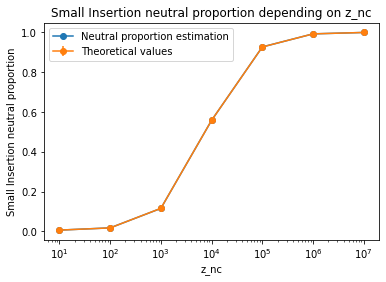

In [5]:
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results.load_results(f"{results_path}/Small insertion")

plt.clf()

plt.plot(
    results.x_values,
    results.neutral_proportions,
    marker="o",
    label="Neutral proportion estimation",
)
plt.errorbar(
    results.x_values,
    results.theoretical_proportions,
    results.neutral_proportiond_stds,
    marker="o",
    label="Theoretical values",
)

plt.title(f"Small Insertion neutral proportion depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Small Insertion neutral proportion")

plt.legend()
plt.show()
plt.close()

## Deletion over duplication ratio
### Assuming homogeneity and single directionnality

In [ ]:
results_duplication = Results(1, 7)
results_deletion = Results(1, 7)

experiment_name = "check_probability/1"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results_duplication.load_results(f"{results_path}/Duplication")
results_deletion.load_results(f"{results_path}/Deletion")
results = results_deletion.neutral_proportions / results_duplication.neutral_proportions

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Neutral proportion ratio deletion/duplication estimation depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Neutral proportion ratio")

plt.legend()

plt.show()

In [ ]:
results = results_deletion.length_means / results_duplication.length_means

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Length means ratio deletion/duplication estimation depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Length means ratio")

plt.legend()

plt.show()

### Without these assumptions

In [ ]:
results_duplication = Results(1, 7)
results_deletion = Results(1, 7)

experiment_name = "compare_probability_h_o/1"
results_path = Path("results") / "mutagenese" / experiment_name / "stats"
results_duplication.load_results(f"{results_path}/Duplication")
results_deletion.load_results(f"{results_path}/Deletion")
results = results_deletion.neutral_proportions / results_duplication.neutral_proportions

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Neutral proportion ratio deletion/duplication estimation depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Neutral proportion ratio")

plt.legend()
plt.show()

Sans l'hypothèse d'homogénéité, les délétions ne sont plus que légèrement moins neutres que les duplications.

In [ ]:
results = results_deletion.length_means / results_duplication.length_means

plt.plot(results_duplication.x_values, results, marker="o")

plt.title(f"Length means ratio deletion/duplication estimation depending on {variable}")

plt.xlabel(f"{variable}")
plt.xscale("log")

plt.ylabel("Length means ratio")

plt.legend()

plt.show()